# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 11. Supervised Classification</u></b><center>

## **DATASET INFORMATION**

+ According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.

+ The report, focusing on data from year 2007, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). 

_**But, what are the causes for these delays?**_

+ In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008.


-----------



+ **Year** 2008
+ **Month** 1-12
+ **DayOfMonth** 1-31
+ **DayOfWeek** 1 (Monday) - 7 (Sunday)
+ **DepTime** actual departure time (local, hhmm)
+ **CRSDepTime** scheduled departure time (local, hhmm)
+ **ArrTime** actual arrival time (local, hhmm)
+ **CRSArrTime** scheduled arrival time (local, hhmm)
+ **UniqueCarrier** unique carrier code
+ **FlightNum** flight number
+ **TailNum** plane tail number: aircraft registration, unique aircraft identifier
+ **ActualElapsedTime** in minutes
+ **CRSElapsedTime** in minutes
+ **AirTime** in minutes
+ **ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
+ **DepDelay** departure delay, in minutes
+ **Origin** origin IATA airport code
+ **Dest** destination IATA airport code
+ **Distance** in miles
+ **TaxiIn** taxi in time, in minutes
+ **TaxiOut** taxi out time in minutes
+ **Cancelled** was the flight cancelled
+ **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ **Diverted** 1 = yes, 0 = no
+ **CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ **WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ **NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ **SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [141]:
# Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [142]:
# CSV. This dataset has been cleaned in the previous task and now we import it to work classifications

airlines = pd.read_csv('./clean_airlines_df.csv')
pd.set_option('display.max_columns', None)
airlines = airlines.drop(['Unnamed: 0'], axis = 1)
airlines.head()

,FlightDate_USA,UniqueCarrier,Origin,Dest,Cancelled,Diverted,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,0,0,2003,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,0,0,754,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19,810,0,0,0,0,0
2,2008-01-03,WN,IND,BWI,0,0,628,620,804.0,750,448,96.0,90.0,76.0,14.0,8,515,0,0,0,0,0
3,2008-01-03,WN,IND,BWI,0,0,1829,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34,515,2,0,0,0,32
4,2008-01-03,WN,IND,JAX,0,0,1940,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25,688,0,0,0,0,0


In [143]:
# Missings
round((airlines.isna().sum())/len(airlines)*100,2)

FlightDate_USA       0.00
UniqueCarrier        0.00
Origin               0.00
Dest                 0.00
Cancelled            0.00
Diverted             0.00
DepTime              0.00
CRSDepTime           0.00
ArrTime              0.37
CRSArrTime           0.00
FlightNum            0.00
ActualElapsedTime    0.43
CRSElapsedTime       0.01
AirTime              0.43
ArrDelay             0.43
DepDelay             0.00
Distance             0.00
CarrierDelay         0.00
WeatherDelay         0.00
NASDelay             0.00
SecurityDelay        0.00
LateAircraftDelay    0.00
dtype: float64

In [144]:
# Diverted and cancelled variables (are the cause of our missings)
print(airlines['Cancelled'].value_counts(), '\n', airlines['Diverted'].value_counts())

0    1936125
1        633
Name: Cancelled, dtype: int64 
 0    1929004
1       7754
Name: Diverted, dtype: int64


+ THE SUM OF **'CANCELED'** AND **'DIVERTED'** FLIGHTS GIVES US THE NUMBER OF MISSINGS FOR THE VARIABLES **'ACTUALELAPSEDTIME'**, **'AIRTIME'** AND **'ARRDELAY'**, WHERE THERE ARE NO RECORDS BECAUSE THE FLIGHTS NEVER ARRIVED AT THE DESTINATION. THEY ARE A VERY LOW PERCENTAGE OF THE SIZE OF THE DATASET (< 1%), FOR THAT REASON, WE WILL PROCEED TO ELIMINATE THEM. IF WE ELIMINATE THE MISSINGS, **CANCELED** AND **DIVERTED** VARIABLES WILL NOT HAVE ANY USE IN OUR SET AND THEREFORE WE ALSO ELIMINATE THEM.

In [145]:
# Drop NaNs
airlines.dropna(inplace=True)
airlines.drop(['Cancelled','Diverted'], axis = 1, inplace= True)

In [146]:
# shape
airlines.shape

(1928371, 20)

In [147]:
# We will reduce the dataset with a sample of 200.000
airlines = airlines.sample(n = 200000, random_state=42)

TO MAKE CLASSIFICATION MODELS WE WILL CREATE A CATEGORICAL VARIABLE FROM THE VARIABLE **'ARRDELAY'** WHICH WILL TAKE THE VALUE 0 IF THE PLANE HAS ARRIVED ON TIME AND THE VALUE 1 IF THE PLANE HAS ARRIVED LATER THAN 15 MINUTES THAN EXPECTED.

In [148]:
# Create our target variable in category
airlines['ArrDelay'] = [1 if x > 15 else 0 for x in airlines['ArrDelay']]

In [149]:
# We see the distribution of delays
round((airlines.ArrDelay.value_counts()/len(airlines.ArrDelay))*100,2)

1    62.97
0    37.03
Name: ArrDelay, dtype: float64

WE SEE HOW 63% OF THE AIRPLANES IN OUR DATASET ARRIVE LATE AT THE DESTINATION AIRPORTS, WHILE ONLY 37% OF THE AIRPLANES ARRIVE EARLY OR ON TIME.

In [150]:
# Variable information
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 403778 to 579272
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FlightDate_USA     200000 non-null  object 
 1   UniqueCarrier      200000 non-null  object 
 2   Origin             200000 non-null  object 
 3   Dest               200000 non-null  object 
 4   DepTime            200000 non-null  int64  
 5   CRSDepTime         200000 non-null  int64  
 6   ArrTime            200000 non-null  float64
 7   CRSArrTime         200000 non-null  int64  
 8   FlightNum          200000 non-null  int64  
 9   ActualElapsedTime  200000 non-null  float64
 10  CRSElapsedTime     200000 non-null  float64
 11  AirTime            200000 non-null  float64
 12  ArrDelay           200000 non-null  int64  
 13  DepDelay           200000 non-null  int64  
 14  Distance           200000 non-null  int64  
 15  CarrierDelay       200000 non-null  int64  
 1

In [151]:
# Variables description
round(airlines.describe(),2)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00
mean,1517.18,1465.87,1609.31,1632.67,2181.31,133.36,134.22,108.30,0.63,43.09,765.32,12.40,2.37,9.83,0.06,16.31
std,450.69,425.03,547.79,464.71,1945.45,71.88,71.10,68.48,0.48,53.54,572.52,36.53,17.15,28.46,1.61,35.88
min,1.00,0.00,1.00,0.00,1.00,15.00,17.00,1.00,0.00,6.00,31.00,0.00,0.00,0.00,0.00,0.00
25%,1202.00,1131.00,1315.00,1324.00,610.00,80.00,81.00,58.00,0.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,1544.00,1510.00,1714.00,1705.00,1541.00,116.00,116.00,90.00,1.00,24.00,606.00,0.00,0.00,0.00,0.00,0.00
75%,1900.00,1815.00,2030.00,2013.00,3405.00,165.00,165.00,138.00,1.00,53.00,998.00,9.00,0.00,6.00,0.00,18.00
max,2400.00,2359.00,2400.00,2359.00,9740.00,667.00,660.00,631.00,1.00,1521.00,4962.00,1395.00,915.00,1289.00,254.00,1254.00


#### **MATRIX**

WE WILL MAKE A MATRIX OF CORRELATIONS TO SEE THE RELATIONSHIPS BETWEEN VARIABLES AND THE RELATIONSHIP WITH OUR TARGET VARIABLE

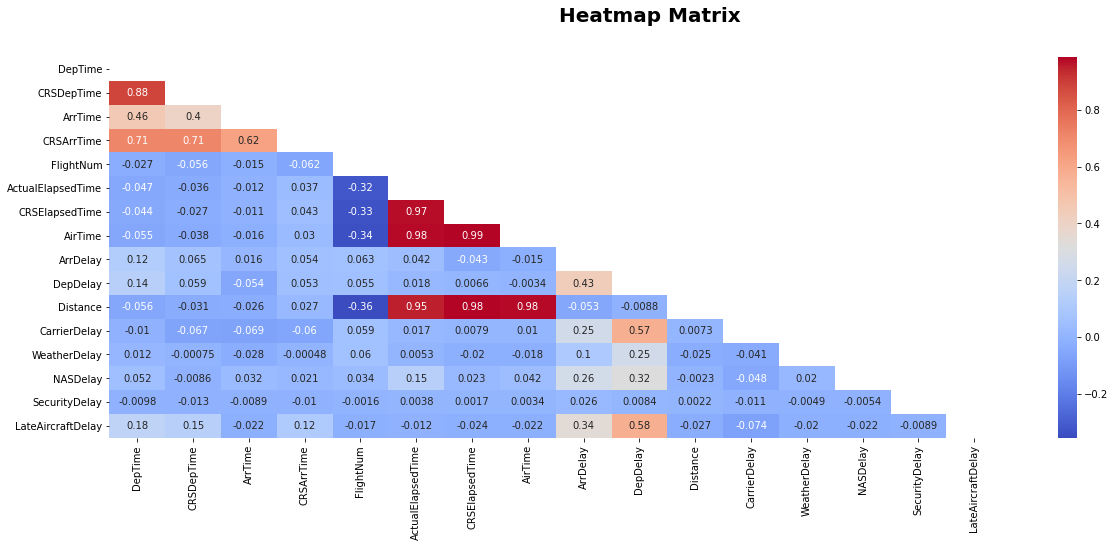

In [152]:
# Correlations Matrix

# Framework
fig, ax = plt.subplots(figsize = (20,7))

# Data
correlation_matrix = airlines.corr(method='pearson')
half_matrix = np.triu(correlation_matrix)

# Plot
sns.heatmap(correlation_matrix, annot = True, mask = half_matrix, cmap = sns.color_palette("coolwarm", as_cmap=True))
fig.suptitle('Heatmap Matrix', fontsize = 20, fontweight = 'bold')
plt.show()

THANKS TO THE MATRIX OF CORRELATIONS WE SEE THAT WE COULD ELIMINATE THOSE VARIABLES THAT ARE VERY SIMILAR AND THAT ALSO INCREASE THE CORRELATION. FOR EXAMPLE, THE VARIABLES **'ARRTIME'** AND **'CRSARRTIME**. THEREFORE WE WILL ELIMINATE THE SCHEDULES.

IN ADDITION, WE CONSIDER IT APPROPRIATE TO ELIMINATE THE DIFFERENT TYPES OF DELAY, SINCE IF WE DO NOT DO IT, WE WILL OBTAIN AN OVERFITTED MODEL. THE DELAY OF AIRCRAFT UPON ARRIVAL IS ENTIRELY EXPLAINED BY THE DIFFERENT TYPES OF DELAY.

In [153]:
# Elimante schedule variables
airlines.drop(['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1, inplace=True)

## **EXERCISE 1**

**STATEMENT:** Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay). Consider whether the flight is late or not (ArrDelay> 0).

THE THREE CLASSIFICATION MODELS WE ARE GOING TO USE FOR OUR DATASET ARE THE FOLLOWING:

+ CLASSIFICATION TREE (DT)

+ K-NEAREST NEIGHBORS

+ LOGISTIC REGRESSION
   
+ XGBOOST 

In [154]:
# Our dataset
airlines.head(2)

,FlightDate_USA,UniqueCarrier,Origin,Dest,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance
403778,2008-03-25,WN,STL,MDW,1124,1221.0,1095,57.0,45.0,0,9,251
1397595,2008-08-09,AA,DFW,MIA,1152,1555.0,1690,183.0,153.0,1,22,1121


WE WILL WORK ONLY WITH NUMERICAL VARIABLES, SINCE WE HAVE BEEN ABLE TO SEE IN PREVIOUS STUDIES THAT THE CATEGORICAL VARIABLES DID NOT PROVIDE MUCH INFORMATION TO THE MODEL WHEN WE CONVERTED THEM TO NUMERICAL

In [155]:
numerical_airlines = airlines.select_dtypes(include = ['float64', 'int'])

In [156]:
numerical_airlines.head(2)

,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance
403778,1124,1221.0,1095,57.0,45.0,0,9,251
1397595,1152,1555.0,1690,183.0,153.0,1,22,1121


### **FUNCTIONS**

WE WILL NEED TO SUMMARIZE IN A DATAFRAME THE RESULTS OF THE METRICS OF THE ALGORITHMS IN THE SIMPLEST POSSIBLE WAY

In [157]:
# Create a variable
comparing_classification_models = pd.DataFrame()

WE CREATE A FUNCTION THAT CALL THE DATAFRAME AND WITH IT SELECT THE **PREDICTOR VARIABLES** AND THE **TARGET VARIABLE** AND THEN MAKE THE CORRESPONDING **SPLIT** OF THE DATA.

In [158]:
# Predictors, Target and Split

def X_y_and_split(dataframe):

    # We globalize the variables so that they can be accessed from anywhere
    global X , y, X_train, X_test, y_train, y_test

    # Variables predictoras
    X = dataframe.drop(['ArrDelay'], axis = 1).values

    # Variable target
    y = dataframe['ArrDelay'].values

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_test_shapes = pd.DataFrame([{'X_train shape: ' : X_train.shape, 'X_test shape: ' : X_test.shape, 'y_train shape: ': y_train.shape, 'y_test shape: ': y_test.shape }])
    print(train_test_shapes)

WE CREATED A **CONFUSION MATRIX** TO HAVE A BETTER RESPONSE OF THE CLASSIFICATION RESULTS.

In [159]:
# Confusion Matrix
def confusion_matrix_classification(y_test, y_pred, y_pred_prob, model_name):
    
    # Confusion Matrix
    confusion_matrix_single = metrics.confusion_matrix(y_test, y_pred)

    # DataFrame
    confusion_matrix_df = pd.DataFrame(confusion_matrix_single)

    # Plot
    fig, ax = plt.subplots(figsize = (10,5))
    sns.heatmap(pd.DataFrame(confusion_matrix_df), annot=True, fmt='d' ,annot_kws={'size': 12}, cmap = 'OrRd') 
    plt.ylabel('Actual', fontsize = 12); plt.xlabel('Predicted', fontsize =12); plt.suptitle(t= 'CONFUSION MATRIX',fontsize =16, fontweight = 'bold'); plt.title(model_name, loc= 'left',fontsize = 14);plt.show()
    
    # Metrics
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    F1 = metrics.f1_score(y_test, y_pred)
    AUC = metrics.roc_auc_score(y_test, y_pred_prob)

    confusion_matrix_metrics = pd.DataFrame([{'Accuracy: ': Accuracy, 'Precision: ': Precision,
    'Recall: ': Recall , 'F1: ': F1 ,'AUC: ': AUC}], index=[model_name])

    # We save the confusion matrix of each example for example 2
    global comparing_classification_models
    comparing_classification_models = comparing_classification_models.append(confusion_matrix_metrics)

    print(confusion_matrix_metrics)
    

WE CREATE THE **ROC CURVE** TO SEE THE THRESHOLD BETWEEN THE RATIO OF TRUE POSITIVES VERSUS THE RATIO OF FALSE POSITIVES

In [160]:
# ROC Curve

def ROC_curve(y_test, y_pred_prob):

    # ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # Plot
    auc = metrics.roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='AUC='+str(auc))
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.0])
    plt.title('ROC Curve Classification');plt.xlabel('False Positive Rate (1 - Specificity)');plt.ylabel('True Positive Rate (Sensitivity)'); plt.legend() ;plt.show()

In [161]:
# Our Dataset
X_y_and_split(numerical_airlines)

  X_train shape:  X_test shape:  y_train shape:  y_test shape: 
0     (160000, 7)     (40000, 7)       (160000,)       (40000,)


### **CLASSIFICATION TREE**

OUR **OBJECTIVE** IS TO SEE THE ACCURACY OF THE ALGORITHM WHEN CLASSIFYING WHETHER AN AIRPLANE HAS ARRIVED ON TIME OR LATE AT THE DESTINATION AIRPORT.

FIRST OF ALL WE WILL MAKE A SIMPLE **CLASSIFICATION TREE** WITHOUT TAKING INTO ACCOUNT ANY PARAMETER.

In [162]:
# Model 1. Classification Tree (DT)
def classification_tree(X_train, X_test, y_train, y_test):

    global classification_tree, y_pred_DT, y_pred_prob_DT, dummy_DT, dummy_pred_DT, dummy_pred_prob_DT
    # Object
    classification_tree = DecisionTreeClassifier() # Without hyperparameterization

    # Train the model
    classification_tree = classification_tree.fit(X_train, y_train)

    # Predictions
    y_pred_DT = classification_tree.predict(X_test)
    y_pred_prob_DT = classification_tree.predict_proba(X_test)[::,1] # Convert to an array

    # Accuracy
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_DT), end = '\n')

    # Dummy classifier
    dummy_DT = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) # Predictions with 1
    dummy_pred_DT = dummy_DT.predict(X_test)
    dummy_pred_prob_DT = dummy_DT.predict_proba(X_test)[::,1] # Convert to an array

    # Dummy Accuracy 
    print('Dummy Accuracy: ', metrics.accuracy_score(y_test, dummy_pred_DT))

Accuracy:  0.8576
Dummy Accuracy:  0.633325


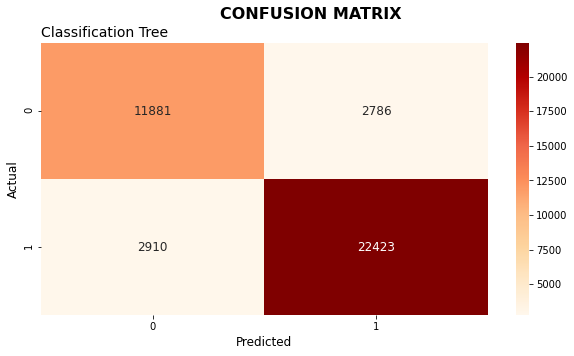

                     Accuracy:   Precision:   Recall:       F1:     AUC: 
Classification Tree      0.8576     0.889484   0.88513  0.887302  0.84759


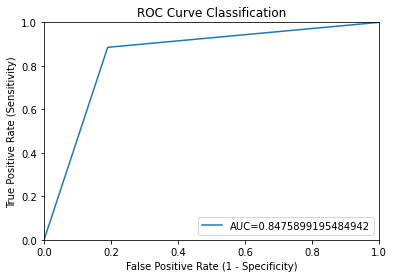

In [163]:
# Classification Tree results

# The model results
classification_tree(X_train, X_test, y_train, y_test) 

# Confusion Matrix
confusion_matrix_classification(y_test, y_pred_DT, y_pred_prob_DT, 'Classification Tree')

# ROC Curve
ROC_curve(y_test, y_pred_prob_DT)


**CONCLUSIONS:** 

+ THE CLASSIFICATION TREE MODEL OBTAINS AN **ACCURACY** OF SUCCESSES OF **'0.8576'**, SO THE CLASSIFIER IS CORRECT **85,76%** OF THE TIMES. WE HAVE ADDED A DUMMY CLASSIFIER THAT SHOWS THE % OF SUCCESSES IF ONLY ARE DETECTED DELAYED FLIGHTS AND THE PERCENTAGE OF SUCCESS WOULD BE **63.33%**, WE COULD CONSIDER IT AS A HIGH PERCENTAGE WHEN WE ARE NOT REALLY PREDICTING ANYTHING ABOUT THE DATA.
---
+ THE CLASSIFICATION TREE MODEL HAS A **PRECISION** OF **'0.8894'**. THIS INDICATOR MEASURES WHEN A POSITIVE VALUE IS PREDICTED, HOW OFTEN IT IS CORRECTLY PREDICTED. THE SUCCESS RESULTS ARE **88.94%** OF THE TIMES.
---
+ THE CLASSIFICATION MODEL HAS A **SENSITIVITY (RECALL)** OF **'0.8851'**. THIS INDICATOR MEASURES WHEN THE TRUE VALUE IS POSITIVE, HOW OFTEN IT IS CORRECTLY PREDICTED. THE RESULTS OF HITTING ARE **88,51%**.
---
+ THE CLASSIFICATION MODEL HAS A **F1** OF **'0.8873'**. THIS INDICATOR SUMMARY OF ACCURACY AND RECOVERY. WHEN F1 = 1 INDICATES PERFECT SENSITIVITY AND ACCURACY. THE F1 RESULT IS **88,73%**.
---
+ THE **ROC CURVE** MEASURES THE DIFFERENT THRESHOLDS WHERE THE RATE OF TRUE POSITIVES IS EQUAL OR DIFFERENT FROM THE RATE OF FALSE POSITIVES. IN OUR CASE WE HAVE AN **AUC** OF **'0.8475'**
---

### **K-NEAREST NEIGHBORS**

FIRST OF ALL WE WILL MAKE A SIMPLE **KNN** WITHOUT TAKING INTO ACCOUNT ANY PARAMETER.

In [164]:
# Model 2. K-Nearest Neighbors (KNN)

def k_nearest_neighbors(X_train, X_test, y_train, y_test):

    global knn_model, y_pred_KNN, y_pred_prob_KNN
    # Object
    knn_classification = KNeighborsClassifier() # Without Hyperparameterization
    
    # Train the model
    knn_model = knn_classification.fit(X_train, y_train)

    # Predictions
    y_pred_KNN = knn_model.predict(X_test)
    y_pred_prob_KNN = knn_model.predict_proba(X_test)[::,1]

    print('Accuracy: ', metrics.accuracy_score(y_test,y_pred_KNN), end = '\n')

Accuracy:  0.73495


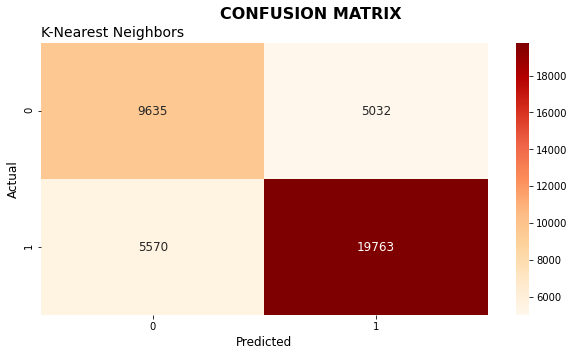

                     Accuracy:   Precision:   Recall:       F1:     AUC: 
K-Nearest Neighbors     0.73495     0.797056  0.780129  0.788501  0.80026


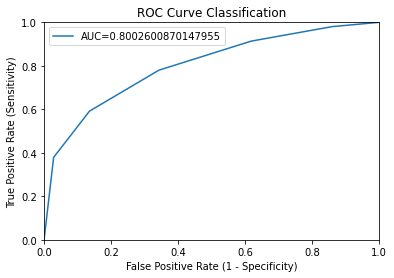

In [165]:
# K-Nearest Neighbors

# The model results
k_nearest_neighbors(X_train, X_test, y_train, y_test)

# Confusion Matrix
confusion_matrix_classification(y_test, y_pred_KNN, y_pred_prob_KNN, 'K-Nearest Neighbors')

# ROC Curve
ROC_curve(y_test, y_pred_prob_KNN)

**CONCLUSIONS:** 

+ THE K-NEAREST NEIGHBOR MODEL OBTAINS AN **ACCURACY** OF SUCCESSES OF **'0.7349'**, SO THE CLASSIFIER IS CORRECT **73,49%** OF THE TIMES.
---
+ THE K-NEAREST NEIGHBOR MODEL HAS A **PRECISION** OF **'0.7970'**. THIS INDICATOR MEASURES WHEN A POSITIVE VALUE IS PREDICTED, HOW OFTEN IT IS CORRECTLY PREDICTED. THE SUCCESS RESULTS ARE **79,70%** OF THE TIMES.
---
+ THE  K-NEAREST NEIGHBOR MODEL HAS A **SENSITIVITY (RECALL)** OF **'0.7801'**. THIS INDICATOR MEASURES WHEN THE TRUE VALUE IS POSITIVE, HOW OFTEN IT IS CORRECTLY PREDICTED. THE RESULTS OF HITTING ARE **78,01%**.
---
+ THE  K-NEAREST NEIGHBOR MODEL HAS A **F1** OF **'0.7885'**. THIS INDICATOR SUMMARY OF ACCURACY AND RECOVERY. WHEN F1 = 1 INDICATES PERFECT SENSITIVITY AND ACCURACY. THE F1 RESULT IS **78,85%**.
---
+ THE **ROC CURVE** MEASURES THE DIFFERENT THRESHOLDS WHERE THE RATE OF TRUE POSITIVES IS EQUAL OR DIFFERENT FROM THE RATE OF FALSE POSITIVES. IN OUR CASE WE HAVE AN **AUC** OF **'0.8002'**
---

### **LOGISTIC REGRESSION**

FIRST OF ALL WE WILL MAKE A SIMPLE **LOGISTIC REGRESSION** WITHOUT TAKING INTO ACCOUNT ANY PARAMETER.


In [166]:
# Model 3. Logistic Regression (LR)

def logistic_regression(X_train, X_test, y_train, y_test):

    global logistic_regression_model, y_pred_LR, y_pred_prob_LR
    # Object
    logistic_regression = LogisticRegression(solver = 'sag', max_iter=300)

    # Train the model
    logistic_regression_model = logistic_regression.fit(X_train, y_train)

    # Predictions
    y_pred_LR = logistic_regression_model.predict(X_test)
    y_pred_prob_LR = logistic_regression_model.predict_proba(X_test)[::,1] 

    # Accuracy
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_LR), end = '\n')


Accuracy:  0.8476


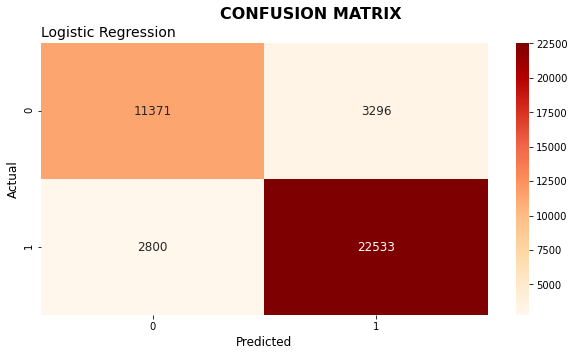

                     Accuracy:   Precision:   Recall:       F1:     AUC: 
Logistic Regression      0.8476     0.872391  0.889472  0.880849  0.92985


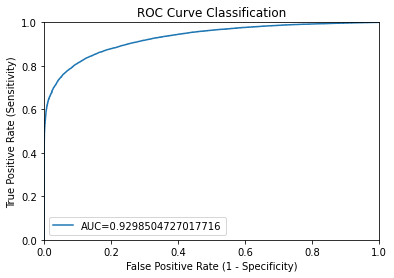

In [167]:
# Logistic Regression Results

# The model results
logistic_regression(X_train, X_test, y_train, y_test)

# Confusion Matrix
confusion_matrix_classification(y_test, y_pred_LR, y_pred_prob_LR, 'Logistic Regression')

# ROC Curve
ROC_curve(y_test, y_pred_prob_LR)

**CONCLUSIONS:** 

+ THE LOGISTIC REGRESSION MODEL OBTAINS AN **ACCURACY** OF SUCCESSES OF **'0.8476'**, SO THE CLASSIFIER IS CORRECT **84,76%** OF THE TIMES.
---
+ THE LOGISTIC REGRESSION MODEL HAS A **PRECISION** OF **'0.8723'**. THIS INDICATOR MEASURES WHEN A POSITIVE VALUE IS PREDICTED, HOW OFTEN IT IS CORRECTLY PREDICTED. THE SUCCESS RESULTS ARE **87,23%** OF THE TIMES.
---
+ THE  LOGISTIC REGRESSION NEAREST NEIGHBOR MODEL HAS A **SENSITIVITY (RECALL)** OF **'0.8894'**. THIS INDICATOR MEASURES WHEN THE TRUE VALUE IS POSITIVE, HOW OFTEN IT IS CORRECTLY PREDICTED. THE RESULTS OF HITTING ARE **88,94%**.
---
+ THE  LOGISTIC REGRESSION  MODEL HAS A **F1** OF **'0.8808'**. THIS INDICATOR SUMMARY OF ACCURACY AND RECOVERY. WHEN F1 = 1 INDICATES PERFECT SENSITIVITY AND ACCURACY. THE F1 RESULT IS **88,08%**.
---
+ THE **ROC CURVE** MEASURES THE DIFFERENT THRESHOLDS WHERE THE RATE OF TRUE POSITIVES IS EQUAL OR DIFFERENT FROM THE RATE OF FALSE POSITIVES. IN OUR CASE WE HAVE AN **AUC** OF **'0.9298'**
---

### **XGBOOST**

FIRST OF ALL WE WILL MAKE A SIMPLE **XGBOOST** ADDING SIMPLE PARAMETERS.

In [168]:
# Model 4. XGBoost (XGB)

def XGBoost(X_train, X_test, y_train, y_test):

    global xgboost_model, y_pred_XGB, y_pred_proba_XGB, rmse
    # Object
    xgboost = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, 
    max_depth = 5, alpha = 10, n_estimators = 10,  eval_metric = 'error' ,use_label_encoder=False)

    # Train the model
    xgboost_model = xgboost.fit(X_train, y_train)

    # Predictions
    y_pred_XGB = xgboost_model.predict(X_test)
    y_pred_proba_XGB = xgboost_model.predict_proba(X_test)[::,1]

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test,y_pred_XGB))
    print('RMSE: %f' %(rmse))




RMSE: 0.428369


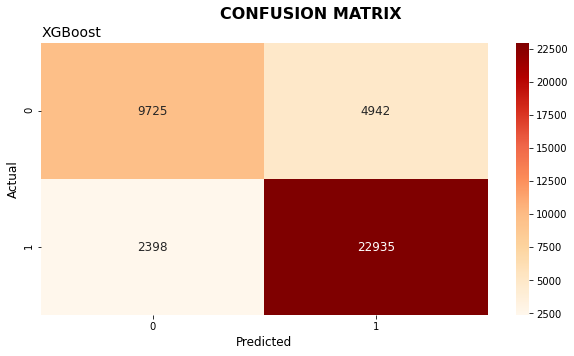

         Accuracy:   Precision:   Recall:       F1:      AUC: 
XGBoost      0.8165     0.822721  0.905341  0.862056  0.908923


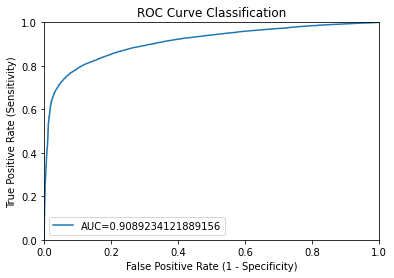

In [169]:
# XGBoost results

# The model results
XGBoost(X_train, X_test, y_train, y_test)

# Confusion Matrix
confusion_matrix_classification(y_test, y_pred_XGB, y_pred_proba_XGB, 'XGBoost')

# ROC Curve
ROC_curve(y_test, y_pred_proba_XGB)


**CONCLUSIONS:** 

+ THE XGBOOST MODEL OBTAINS AN **ACCURACY** OF SUCCESSES OF **'0.8165'**, SO THE CLASSIFIER IS CORRECT **81,65%** OF THE TIMES.
---
+ THE XGBOOST MODEL HAS A **PRECISION** OF **'0.8227'**. THIS INDICATOR MEASURES WHEN A POSITIVE VALUE IS PREDICTED, HOW OFTEN IT IS CORRECTLY PREDICTED. THE SUCCESS RESULTS ARE **82,27%** OF THE TIMES.
---
+ THE  XGBOOST NEAREST NEIGHBOR MODEL HAS A **SENSITIVITY (RECALL)** OF **'0.9053'**. THIS INDICATOR MEASURES WHEN THE TRUE VALUE IS POSITIVE, HOW OFTEN IT IS CORRECTLY PREDICTED. THE RESULTS OF HITTING ARE **90,53%**.
---
+ THE  XGBOOST  MODEL HAS A **F1** OF **'0.8620'**. THIS INDICATOR SUMMARY OF ACCURACY AND RECOVERY. WHEN F1 = 1 INDICATES PERFECT SENSITIVITY AND ACCURACY. THE F1 RESULT IS **86,20%**.
---
+ THE **ROC CURVE** MEASURES THE DIFFERENT THRESHOLDS WHERE THE RATE OF TRUE POSITIVES IS EQUAL OR DIFFERENT FROM THE RATE OF FALSE POSITIVES. IN OUR CASE WE HAVE AN **AUC** OF **'0.9089'**
---

## **Exercise 2**
**STATEMENT:** Compare the classification models using precision (accuracy), a matrix of confidence and of other more advanced metrics.

In [170]:
# Results
comparing_classification_models

,Accuracy:,Precision:,Recall:,F1:,AUC:
Classification Tree,0.85760,0.889484,0.885130,0.887302,0.847590
K-Nearest Neighbors,0.73495,0.797056,0.780129,0.788501,0.800260
Logistic Regression,0.84760,0.872391,0.889472,0.880849,0.929850
XGBoost,0.81650,0.822721,0.905341,0.862056,0.908923


**CONCLUSIONS**

IF WE LOOK AT THE INDICATORS OF EACH OF THE 4 MODELS, WE CAN SEE THAT THE BEST RESULTS ARE OFFERED BY THE **CLASSIFICATION TREE**, **LOGISTIC REGRESSION** AND **XGBOOST** ALGORITHMS, RESPECTIVELY. WE CAN SEE THAT THE BEST **AUC** IS OFFERED BY **LOGISTIC REGRESSION**, THAT MEANS IS THE ALGORITHM WITH THE BEST CLASSIFIER FOLLOWED BY **XGBOOST**. FOR THE MOMENT!

## **Exercise 3**
**STATEMENT:** Train them using the different parameters they support.

### **CLASSIFICATION TREE (NEW PARAMETERS)**

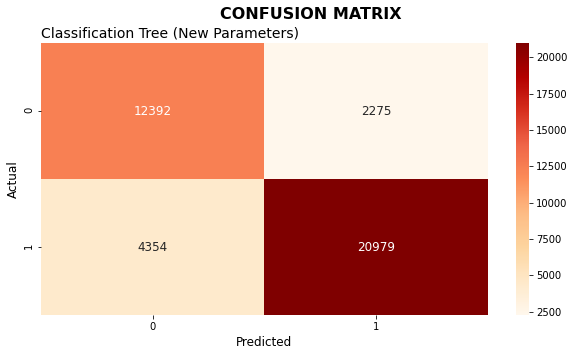

                                      Accuracy:   Precision:   Recall:   \
Classification Tree (New Parameters)    0.834275     0.902167  0.828129   

                                          F1:      AUC:   
Classification Tree (New Parameters)  0.863564  0.907411  


In [171]:
# Model 1. Classification Tree (DT_parameters)

# Object
classification_tree_parameters = DecisionTreeClassifier(criterion='entropy', max_depth= 3)

# Train the model
classification_tree_parameters_model = classification_tree_parameters.fit(X_train, y_train)

# Predictions
y_pred_DT_parameters = classification_tree_parameters_model.predict(X_test)
y_pred_proba_DT_parameters = classification_tree_parameters_model.predict_proba(X_test)[::,1]

# Classification Tree results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_DT_parameters, y_pred_proba_DT_parameters, 'Classification Tree (New Parameters)')

### **K-NEAREST NEIGHBORS (NEW PARAMETERS)**

IN THE **KNN MODEL** WE DO NOT KNOW WHICH VALUE OF K-NEIGHBORS GIVES THE BEST RESULTS. FOR THIS WE WILL LOOK FOR THE BEST VALUE OF 'K' FROM PLOTTING THE AVERAGE ERROR RATES. THE 'K' THAT HAS A LOWER VALUE IS THE ONE WE WILL CHOOSE.

IN THE PREVIOUS EXERCISE, BY NOT DECLARE THE NUMBER OF 'K' IT IS ESTABLISHED AS 5 BY DEFAULT.

Text(0, 0.5, 'Mean Error')

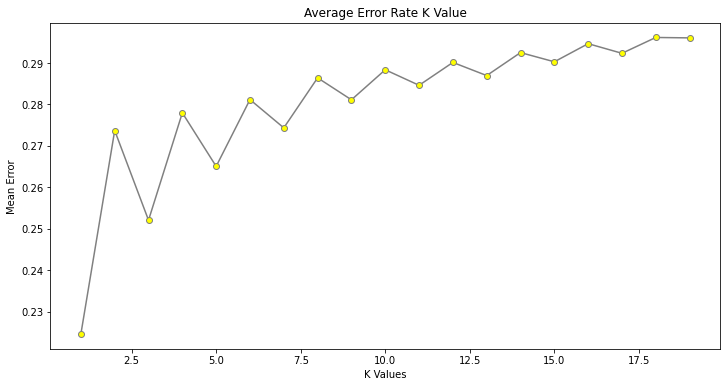

In [172]:
# Mean Error Rate
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# Plot
plt.figure(figsize = (12,6))
plt.plot(range(1,20), error, color = 'gray', marker = 'o', markerfacecolor = 'yellow'); plt.title('Average Error Rate K Value'); plt.xlabel('K Values'); plt.ylabel('Mean Error')

WE CAN CONCLUDE THAT THE LOWEST AVERAGE ERROR IS FOUND FOR A VERY LOW VALUE OF 'K'. THEREFORE, WE WILL STAY WITH A K-NEIGHBORS = 1.

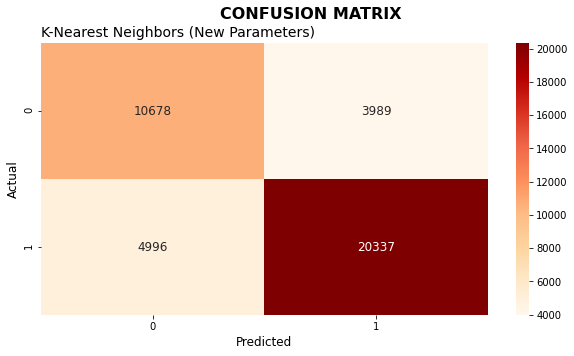

                                      Accuracy:   Precision:   Recall:   \
K-Nearest Neighbors (New Parameters)    0.775375     0.836019  0.802787   

                                          F1:      AUC:   
K-Nearest Neighbors (New Parameters)  0.819066  0.765408  


In [173]:
# Model 2. K-Nearest Neighbors (KNN_parameters)

# Object
k_nearest_neighbors_parameters = KNeighborsClassifier(n_neighbors= 1, weights='distance', algorithm='ball_tree')

# Train the model
k_nearest_neighbors_parameters_model = k_nearest_neighbors_parameters.fit(X_train, y_train)

# Predictions
y_pred_KNN_parameters = k_nearest_neighbors_parameters_model.predict(X_test)
y_pred_prob_KNN_parameters = k_nearest_neighbors_parameters_model.predict_proba(X_test)[::,1]

# K-Nearest Neighbors results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_KNN_parameters, y_pred_prob_KNN_parameters, 'K-Nearest Neighbors (New Parameters)')

### **LOGISTIC REGRESSION**

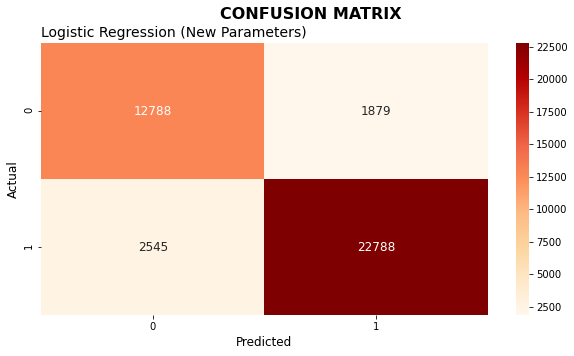

                                      Accuracy:   Precision:   Recall:   \
Logistic Regression (New Parameters)      0.8894     0.923825  0.899538   

                                         F1:      AUC:   
Logistic Regression (New Parameters)  0.91152  0.958597  


In [174]:
# Model 3. Logistic Regression (LR_parameters)

# Object
logistic_regression_parameters = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter=300, random_state = 42)

# Train the model
logistic_regression_parameters_model = logistic_regression_parameters.fit(X_train, y_train)

# Predictions
y_pred_LR_parameters = logistic_regression_parameters_model.predict(X_test)
y_pred_proba_LR_parameters = logistic_regression_parameters_model.predict_proba(X_test)[::,1]

# Logistic Regression results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_LR_parameters, y_pred_proba_LR_parameters, 'Logistic Regression (New Parameters)')

### **XGBOOST**

RMSE; 0.308585


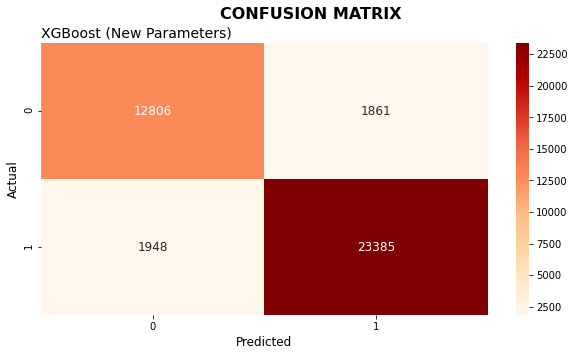

                          Accuracy:   Precision:   Recall:       F1:   \
XGBoost (New Parameters)    0.904775     0.926285  0.923104  0.924692   

                             AUC:   
XGBoost (New Parameters)  0.969416  


In [175]:
# Model 4. XGBoost (XGB_parameters)

# Object
xgboost_parameters = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, subsample=1, eval_metric = 'logloss',use_label_encoder=False)

# Train the model
xgboost_parameters_model = xgboost_parameters.fit(X_train, y_train)

# Predictions
y_pred_XGB_parameters = xgboost_parameters_model.predict(X_test)
y_pred_proba_XGB_parameters = xgboost_parameters_model.predict_proba(X_test)[::,1]

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB_parameters))
print('RMSE; %f' %(rmse))

# XGBoost results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_XGB_parameters, y_pred_proba_XGB_parameters, 'XGBoost (New Parameters)')


In [176]:
comparing_classification_models

,Accuracy:,Precision:,Recall:,F1:,AUC:
Classification Tree,0.857600,0.889484,0.885130,0.887302,0.847590
K-Nearest Neighbors,0.734950,0.797056,0.780129,0.788501,0.800260
Logistic Regression,0.847600,0.872391,0.889472,0.880849,0.929850
XGBoost,0.816500,0.822721,0.905341,0.862056,0.908923
Classification Tree (New Parameters),0.834275,0.902167,0.828129,0.863564,0.907411
K-Nearest Neighbors (New Parameters),0.775375,0.836019,0.802787,0.819066,0.765408
Logistic Regression (New Parameters),0.889400,0.923825,0.899538,0.911520,0.958597
XGBoost (New Parameters),0.904775,0.926285,0.923104,0.924692,0.969416


THE INCLUSION OF NEW PARAMETERS SHOW US THAT OUR MODELS FIT THE DATA BETTER. THE MODEL THAT HAS A WORST FIT AFTER ADDING NEW PARAMETERS THE **CLASSIFICATION TREE**

## **Exercise 4**
**STATEMENT:** Compare your performance using the train/test or cross-validation approach.

WE WILL USE THE **TRAIN/TEST** FOR THE FOLLOWING MODELS:

+ **CLASSIFICATION TREE**
+ **LOGISTIC REGRESSION**

WE WILL USE THE CROSS-VALIDATION FOR THE FOLLOWING MODELS:

+ **K-NEAREST NEIGHBORS**
+ **XGBOOST**

In [177]:
# We show X without split
X

array([[1124., 1221., 1095., ...,   45.,    9.,  251.],
       [1152., 1555., 1690., ...,  153.,   22., 1121.],
       [1226., 1405., 5615., ...,   79.,   16.,  528.],
       ...,
       [1236., 1315.,  657., ...,   24.,   11.,  120.],
       [ 956., 1227.,  682., ...,  133.,   11.,  978.],
       [1810., 2011.,  654., ...,   51.,   10.,  347.]])

In [178]:
# We show y without split
y

array([0, 1, 0, ..., 0, 0, 0])

### **CLASSIFICATION TREE (X/Y)**

WE WILL USE THE FIRST MODEL BECAUSE IT HAS A BETTER FIT

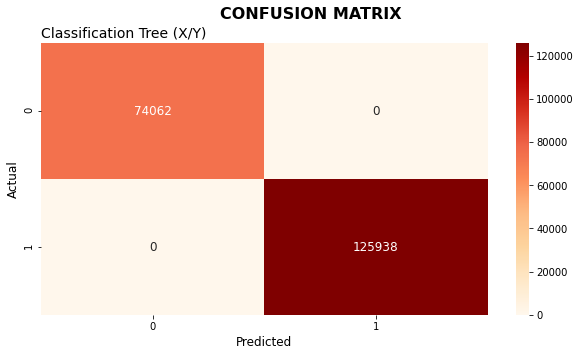

                           Accuracy:   Precision:   Recall:   F1:   AUC: 
Classification Tree (X/Y)         1.0          1.0       1.0   1.0    1.0


In [179]:
# Model 1. Classification Tree (X/Y)

# Object
classification_tree_x_y = DecisionTreeClassifier()

# Train the model
classification_tree_x_y_model = classification_tree_x_y.fit(X,y)

# Predictions
y_pred_x_y = classification_tree_x_y_model.predict(X)
y_pred_proba_x_y = classification_tree_x_y_model.predict_proba(X)[::,1]

confusion_matrix_classification(y, y_pred_x_y, y_pred_proba_x_y, 'Classification Tree (X/Y)')

WE CLEARLY SEE HOW IT IS OVERFITTED, SINCE ALL THE DATA USED IN THE TRAINING SERVE TO PREDICT THE RESPONSE.

### **LOGISTIC REGRESSION (X/Y)**

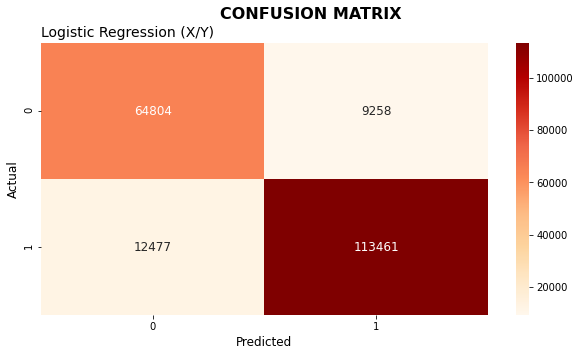

                           Accuracy:   Precision:   Recall:      F1:   \
Logistic Regression (X/Y)    0.891325     0.924559  0.900927  0.91259   

                              AUC:   
Logistic Regression (X/Y)  0.959763  


In [180]:
# Model 3. Logistic Regression (X/Y)

# Object
logistic_regression_x_y = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter=300, random_state = 42)

# Train the model
logistic_regression_x_y_model = logistic_regression_x_y.fit(X, y)

# Predictions
y_pred_LR_x_y = logistic_regression_x_y_model.predict(X)
y_pred_proba_LR_x_y = logistic_regression_x_y_model.predict_proba(X)[::,1]

# Logistic Regression results (Confusion Matrix)
confusion_matrix_classification(y, y_pred_LR_x_y, y_pred_proba_LR_x_y, 'Logistic Regression (X/Y)')

### **K-NEAREST NEIGHBORS (CROSS-VALIDATION)**

TO BUILD ROBUST MODELS IS COMMON TO DO A K-FOLD CROSS VALIDATION, WHERE ALL ENTRIES FROM THE ORIGINAL TRAINING DATASET ARE USED FOR TRAINING AS WELL AS FOR VALIDATION. FOR THIS WE WILL USE THE **'CV'** METHOD. WE WILL HAVE TO SPECIFY THE **'N-FOLDS'** WHICH IS THE NUMBER OF CROSS VALIDATION SETS WE WANT.

In [181]:
# Model 2. K-Nearest Neighbors (Cross Validation)

k_nearest_neighbors_parameters = KNeighborsClassifier(n_neighbors= 1, weights='distance', algorithm='ball_tree')

cross_validation = KFold(n_splits=10, random_state =42, shuffle= True)
scores =  cross_val_score(k_nearest_neighbors_parameters, X , y, scoring= 'accuracy', cv = cross_validation)
print('Accuracy: mean %.3f std(%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: mean 0.782 std(0.003)


### **XGBOOST**

In [182]:
# Model 4. XGBoost (Cross Validation)

# Convert the dataset to an optimized data structure
data_dmatrix = xgb.DMatrix(data= X, label=y)

# Parameters
params = {'objective': 'binary:logistic', 'colsample_bytree':0.3, 'learning_rate': 0.1,
          'max_depth': 5, 'alpha':10} # We could put it directly in the CV function

cv_results = xgb.cv(dtrain= data_dmatrix, params= params, nfold = 3, 
num_boost_round=50, early_stopping_rounds=10, metrics = 'rmse', as_pandas =True, seed = 42)


In [183]:
# We look at the RMSE training and testing metrics for each round of effort
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.473511,0.000105,0.473551,0.000067
1,0.469979,0.000451,0.470072,0.000502
2,0.454314,0.008694,0.454370,0.008887
3,0.451767,0.008556,0.451882,0.008714
4,0.444121,0.014357,0.444204,0.014581


In [184]:
# Extract the last metric
cv_results['test-rmse-mean'].tail(1)

49    0.326482
Name: test-rmse-mean, dtype: float64

WE CAN SEE HOW THE **RMSE** FOR FLIGHT DELAYS HAS BEEN REDUCED COMPARED TO THE FIRST TIME.

## **Exercise 5**
**STATEMENT:** Perform some variable engineering process to improve prediction

### **IMBALANCED DATASET (SMOTE)**

INSTEAD OF GENERATING NEW SYNTHETIC BLINDLY EXAMPLES FOR THE MINORITY CLASS, WE WILL USE THE **BORDERLINE - SMOTE** METHOD TO CREATE SYNTHETIC EXAMPLES AT THE DECISION BOUNDARY BETWEEN THE TWO CLASSES.

In [185]:
# Our dataset
numerical_airlines.head()

,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance
403778,1124,1221.0,1095,57.0,45.0,0,9,251
1397595,1152,1555.0,1690,183.0,153.0,1,22,1121
1849546,1226,1405.0,5615,99.0,79.0,0,16,528
18418,2046,2158.0,1274,132.0,103.0,1,56,629
1805454,1759,2026.0,6180,87.0,71.0,1,50,495


In [186]:
# We see the distribution of delays
round((numerical_airlines.ArrDelay.value_counts()/len(numerical_airlines.ArrDelay))*100,2)

1    62.97
0    37.03
Name: ArrDelay, dtype: float64

FOR EVERY 6 PLANES THAT ARRIVE LATE, 4 ARE ON TIME. WE HAVE A 6:4. SO THE DATA ARE UNBALANCED AND WE WILL USE THE **'SMOTE'** TECHNIQUE TO SOLVE THIS BIAS.

Counter({1: 125938, 0: 74062})
Counter({0: 125938, 1: 125938})


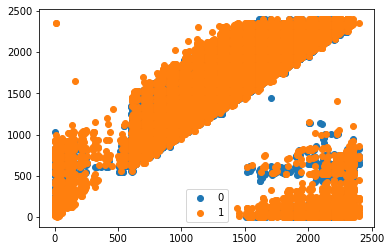

In [187]:
# SMOTE WITH SELECTIVE GENERATION OF SYNTHETIC SAMPLES (LIMIT SMOTE)

# Variables predictoras
X = numerical_airlines.drop(['ArrDelay'], axis = 1).values

# Variable target
y = numerical_airlines['ArrDelay'].values

# Summarize distribution of class
counter = Counter(y)
print(counter)

# Transfom the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X,y)

# Summarize new distribution of class
counter = Counter(y)
print(counter)

# Scatterplot
for label, _ in counter.items():
  row_ix = np.where(y ==label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()


### **STANDARDIZATION**

In [188]:
# Standardization

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = ['DepTime','ArrTime','FlightNum','ActualElapsedTime','AirTime','DepDelay','Distance'])
y = pd.DataFrame(y, columns = ['ArrDelay'])
numerical_airlines_scaled = pd.concat([X_scaled, y], axis = 1)
numerical_airlines_scaled.head(3)

,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,DepDelay,Distance,ArrDelay
0,-0.863813,-0.726344,-0.569747,-1.050149,-0.921978,-0.567635,-0.900614,0
1,-0.801292,-0.105195,-0.264170,0.711529,0.656943,-0.303765,0.615190,1
2,-0.636056,-0.384154,1.751613,-0.462923,-0.424910,-0.425551,-0.417996,0


WE TEST THE MODELS TO SEE IF THERE HAVE BEEN IMPROVEMENTS

In [189]:
# Split the dataset
X_y_and_split(numerical_airlines_scaled)

  X_train shape:  X_test shape:  y_train shape:  y_test shape: 
0     (201500, 7)     (50376, 7)       (201500,)       (50376,)


### **CLASSIFICATION TREE (FEATURE ENGINEERING)**

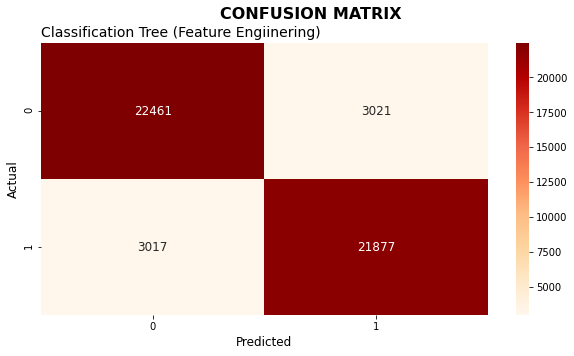

                                           Accuracy:   Precision:   Recall:   \
Classification Tree (Feature Engiinering)    0.880141     0.878665  0.878806   

                                               F1:      AUC:   
Classification Tree (Feature Engiinering)  0.878736  0.880126  


In [190]:
# Model 1. Classification Tree (DT_enginnering)

# Object
classification_tree_engineering = DecisionTreeClassifier() # Without hyperparameterization

# Train the model
classification_tree_engineering_model= classification_tree_engineering.fit(X_train, y_train)

# Predictions
y_pred_DT_engineering = classification_tree_engineering_model.predict(X_test)
y_pred_prob_DT_engineering = classification_tree_engineering_model.predict_proba(X_test)[::,1] 

# Classification Tree results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_DT_engineering, y_pred_prob_DT_engineering, 'Classification Tree (Feature Engiinering)')

### **K-NEAREST NEIGHBORS (FEATURE ENGINEERING)**

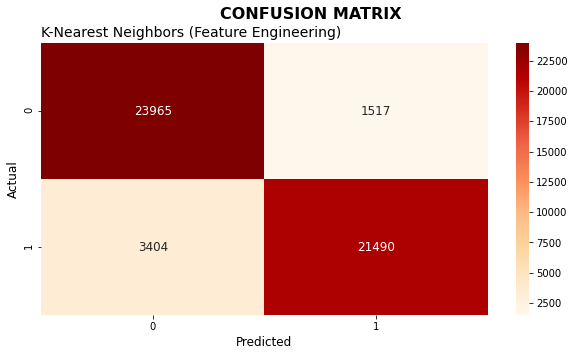

                                           Accuracy:   Precision:   Recall:   \
K-Nearest Neighbors (Feature Engineering)    0.902315     0.934064   0.86326   

                                               F1:      AUC:   
K-Nearest Neighbors (Feature Engineering)  0.897267  0.901864  


In [191]:
# Model 2. K-Nearest Neighbors (KNN_enginnering)

# Object
k_nearest_neighbors_engineering = KNeighborsClassifier(n_neighbors= 1, weights='distance', algorithm='ball_tree')

# Train the model
k_nearest_neighbors_engineering_model = k_nearest_neighbors_engineering.fit(X_train, y_train)

# Predictions
y_pred_KNN_engineering = k_nearest_neighbors_engineering_model.predict(X_test)
y_pred_prob_KNN_engineering = k_nearest_neighbors_engineering_model.predict_proba(X_test)[::,1]

# K-Nearest Neighbors results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_KNN_engineering, y_pred_prob_KNN_engineering, 'K-Nearest Neighbors (Feature Engineering)')

### **LOGISTIC REGRESSION (FEATURE ENGINEERING)**

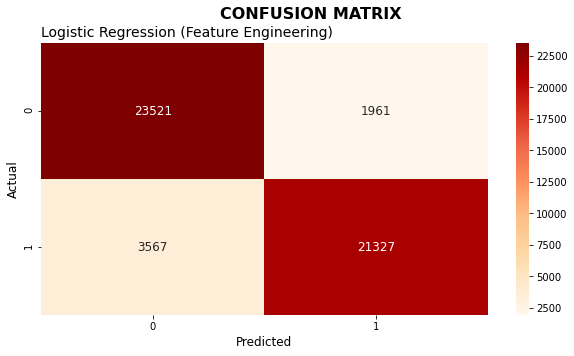

                                           Accuracy:   Precision:   Recall:   \
Logistic Regression (Feature Engineering)    0.890265     0.915794  0.856712   

                                               F1:     AUC:   
Logistic Regression (Feature Engineering)  0.885268  0.95855  


In [192]:
# Model 3. Logistic Regression (LR_enginnering)

# Object
logistic_regression_enginnering= LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter=300, random_state = 42)

# Train the model
logistic_regression_enginnering_model = logistic_regression_enginnering.fit(X_train, y_train)

# Predictions
y_pred_LR_enginnering = logistic_regression_enginnering_model.predict(X_test)
y_pred_proba_LR_enginnering = logistic_regression_enginnering_model.predict_proba(X_test)[::,1]

# Logistic Regression results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_LR_enginnering, y_pred_proba_LR_enginnering, 'Logistic Regression (Feature Engineering)')

### **XGBOOST (FEATUE ENGINEERING)**

RMSE; 0.282067


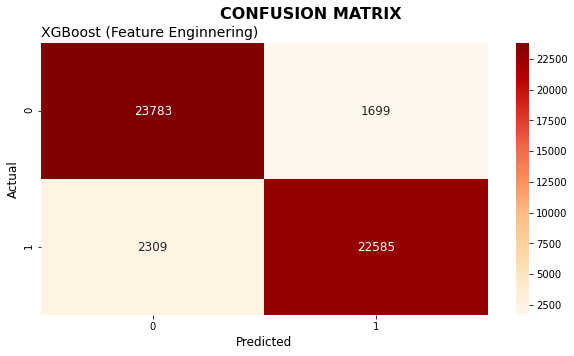

                               Accuracy:   Precision:   Recall:     F1:   \
XGBoost (Feature Enginnering)    0.920438     0.930036  0.907247  0.9185   

                                  AUC:   
XGBoost (Feature Enginnering)  0.980003  


In [193]:
# Model 4. XGBoost (XGB_engineering)

# Object
xgboost_engineering = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, subsample=1, eval_metric = 'logloss',use_label_encoder=False)

# Train the model
xgboost_engineering_model = xgboost_engineering.fit(X_train, y_train)

# Predictions
y_pred_XGB_engineering = xgboost_engineering_model.predict(X_test)
y_pred_proba_XGB_engineering = xgboost_engineering_model.predict_proba(X_test)[::,1]

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB_engineering))
print('RMSE; %f' %(rmse))

# XGBoost results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_XGB_engineering, y_pred_proba_XGB_engineering, 'XGBoost (Feature Enginnering)')

In [194]:
# Results
comparing_classification_models

,Accuracy:,Precision:,Recall:,F1:,AUC:
Classification Tree,0.857600,0.889484,0.885130,0.887302,0.847590
K-Nearest Neighbors,0.734950,0.797056,0.780129,0.788501,0.800260
Logistic Regression,0.847600,0.872391,0.889472,0.880849,0.929850
XGBoost,0.816500,0.822721,0.905341,0.862056,0.908923
Classification Tree (New Parameters),0.834275,0.902167,0.828129,0.863564,0.907411
K-Nearest Neighbors (New Parameters),0.775375,0.836019,0.802787,0.819066,0.765408
Logistic Regression (New Parameters),0.889400,0.923825,0.899538,0.911520,0.958597
XGBoost (New Parameters),0.904775,0.926285,0.923104,0.924692,0.969416
Classification Tree (X/Y),1.000000,1.000000,1.000000,1.000000,1.000000
Logistic Regression (X/Y),0.891325,0.924559,0.900927,0.912590,0.959763


WITHOUT TAKING INTO ACCOUNT THE MODELS (X/Y) WHICH ARE OVERFITTED MODELS BECAUSE THE TRAINING AND TEST DATA ARE THE SAME, WE HAVE BEEN IMPROVING THE MODELS AS WE HAVE ADDED **NEW PARAMETERS** AND **FEATURE ENGINEERING**.

## **Exercise 6**
**STATEMENT:** Do not use Display variable when making predictions

In [195]:
# Eliminate 'DepDelay'
numerical_airlines_scaled_depdelay = numerical_airlines_scaled.drop(['DepDelay'], axis = 1)

In [196]:
X_y_and_split(numerical_airlines_scaled_depdelay)

  X_train shape:  X_test shape:  y_train shape:  y_test shape: 
0     (201500, 6)     (50376, 6)       (201500,)       (50376,)


### **CLASSIFICATION TREE (NO DEPDELAY)**

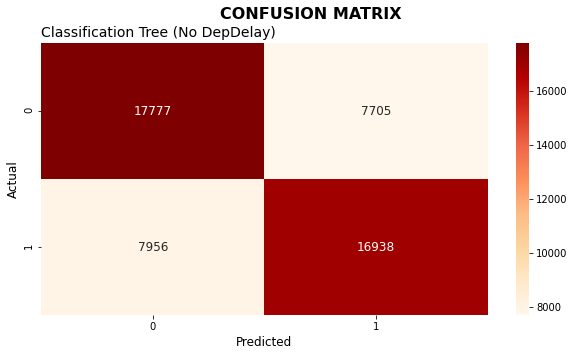

                                   Accuracy:   Precision:   Recall:   \
Classification Tree (No DepDelay)    0.689118     0.687335  0.680405   

                                       F1:      AUC:   
Classification Tree (No DepDelay)  0.683852  0.689017  


In [201]:
# Model 1. Classification Tree (DT_depdelay)

# Object
classification_tree_depdelay = DecisionTreeClassifier() # Without hyperparameterization

# Train the model
classification_tree_depdelay_model= classification_tree_depdelay.fit(X_train, y_train)

# Predictions
y_pred_DT_depdelay = classification_tree_depdelay_model.predict(X_test)
y_pred_prob_DT_depdelay = classification_tree_depdelay_model.predict_proba(X_test)[::,1] 

# Classification Tree results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_DT_depdelay, y_pred_prob_DT_depdelay, 'Classification Tree (No DepDelay)')


### **K-NEAREST NEIGHBORS (NO DEPDELAY)**

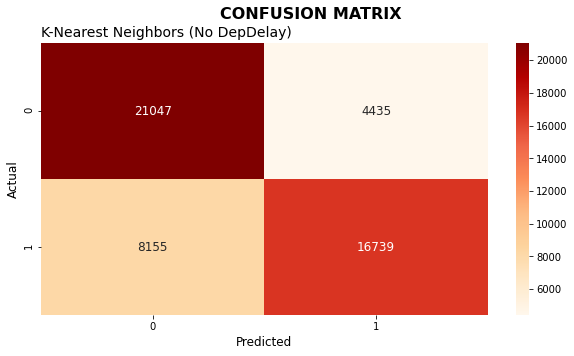

                                   Accuracy:   Precision:   Recall:   \
K-Nearest Neighbors (No DepDelay)    0.750079     0.790545  0.672411   

                                       F1:      AUC:   
K-Nearest Neighbors (No DepDelay)  0.726708  0.749183  


In [202]:
# Model 2. K-Nearest Neighbors (KNN_depdelay)

# Object
k_nearest_neighbors_depdelay = KNeighborsClassifier(n_neighbors= 1, weights='distance', algorithm='ball_tree')

# Train the model
k_nearest_neighbors_depdelay_model = k_nearest_neighbors_depdelay.fit(X_train, y_train)

# Predictions
y_pred_KNN_depdelay = k_nearest_neighbors_depdelay_model.predict(X_test)
y_pred_prob_KNN_depdelay = k_nearest_neighbors_depdelay_model.predict_proba(X_test)[::,1]

# K-Nearest Neighbors results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_KNN_depdelay, y_pred_prob_KNN_depdelay, 'K-Nearest Neighbors (No DepDelay)')

### **LOGISTIC REGRESSION (NO DEPDELAY)**

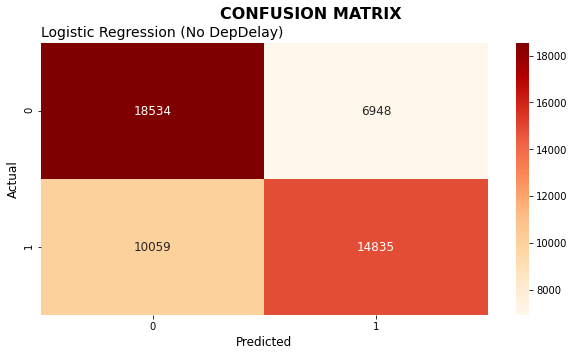

                                   Accuracy:   Precision:   Recall:   \
Logistic Regression (No DepDelay)    0.662399     0.681036  0.595927   

                                       F1:      AUC:   
Logistic Regression (No DepDelay)  0.635645  0.714871  


In [204]:
# Model 3. Logistic Regression (LR_depdelay)

# Object
logistic_regression_depdelay = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter=300, random_state = 42)

# Train the model
logistic_regression_depdelay_model = logistic_regression_depdelay.fit(X_train, y_train)

# Predictions
y_pred_LR_depdelay = logistic_regression_depdelay_model.predict(X_test)
y_pred_proba_LR_depdelay = logistic_regression_depdelay_model.predict_proba(X_test)[::,1]

# Logistic Regression results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_LR_depdelay, y_pred_proba_LR_depdelay, 'Logistic Regression (No DepDelay)')

### **XGBOOST (NO DEPDELAY)**

RMSE; 0.515501


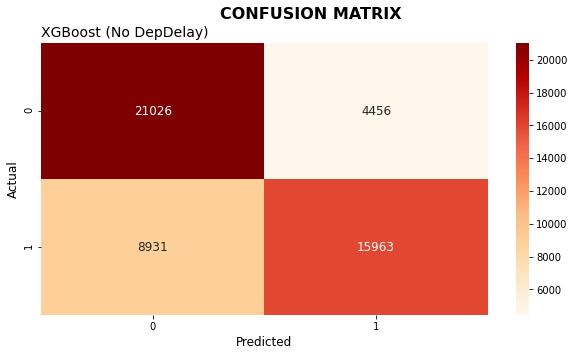

                       Accuracy:   Precision:   Recall:       F1:      AUC: 
XGBoost (No DepDelay)    0.734258     0.781772  0.641239  0.704566  0.825558


In [205]:
# Model 4. XGBoost (XGB__depdelay)

# Object
xgboost_depdelay = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, subsample=1, eval_metric = 'logloss',use_label_encoder=False)

# Train the model
xgboost_depdelay_model = xgboost_depdelay.fit(X_train, y_train)

# Predictions
y_pred_XGB_depdelay = xgboost_depdelay_model.predict(X_test)
y_pred_proba_XGB_depdelay = xgboost_depdelay_model.predict_proba(X_test)[::,1]

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB_depdelay))
print('RMSE; %f' %(rmse))

# XGBoost results (Confusion Matrix)
confusion_matrix_classification(y_test, y_pred_XGB_depdelay, y_pred_proba_XGB_depdelay, 'XGBoost (No DepDelay)')

In [206]:
# Results
comparing_classification_models

,Accuracy:,Precision:,Recall:,F1:,AUC:
Classification Tree,0.857600,0.889484,0.885130,0.887302,0.847590
K-Nearest Neighbors,0.734950,0.797056,0.780129,0.788501,0.800260
Logistic Regression,0.847600,0.872391,0.889472,0.880849,0.929850
XGBoost,0.816500,0.822721,0.905341,0.862056,0.908923
Classification Tree (New Parameters),0.834275,0.902167,0.828129,0.863564,0.907411
K-Nearest Neighbors (New Parameters),0.775375,0.836019,0.802787,0.819066,0.765408
Logistic Regression (New Parameters),0.889400,0.923825,0.899538,0.911520,0.958597
XGBoost (New Parameters),0.904775,0.926285,0.923104,0.924692,0.969416
Classification Tree (X/Y),1.000000,1.000000,1.000000,1.000000,1.000000
Logistic Regression (X/Y),0.891325,0.924559,0.900927,0.912590,0.959763


ONCE WE HAVE REMOVED THE PREDICTOR VARIABLE **'DEPDELAY'** WE HAVE SEEN THAT THE CLASSIFICATION MODELS HAVE LOST A LOT OF PRECISION AND THIS IS BECAUSE THIS VARIABLE IS VERY GOOD TO EXPLAIN WHETHER AN AIRPLANE WILL ARRIVE LATE OR NOT AT ITS DESTINATION.

**CONCLUSIONS**

+ IN THIS TASK WE HAVE BEEN ABLE TO LEARN DIFFERENT TYPES OF CLASSIFICATION ALGORITHMS, SOME MORE COMPLEX THAN OTHERS.

+ IN THIS EXERCISE WE ARE INTERESTED IN MAKING THE FALSE NEGATIVES (FN) AS LOW AS POSSIBLE, BECAUSE IT IS NOT DESIRABLE TO PREDICT THAT AN AIRPLANE IS NOT GOING TO ARRIVE LATE WHEN IT IS GOING TO BE LATE.

+ THE CLASSIFIER THAT HAS GIVEN THE BEST RESULTS HAS BEEN **XGBOOST**